In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import glob
from statannotations.Annotator import Annotator

In [ ]:
cv_list = glob.glob("./figure3/h3a_cv/output2/*.csv")
cvn = pd.read_csv(cv_list[0], index_col = 0)
#cvn.index = cvn.index + str(0)
for i in range(1, len(cv_list)):
    cvi = pd.read_csv(cv_list[i], index_col = 0)
    #cvi.index = cvi.index + str(i)
    cvn = pd.concat([cvn, cvi], axis = 0)
cvn["type"] = cvn.index
df_cv1 = cvn.melt(id_vars=["type"], var_name="K", value_name="value")
# cv_list = glob.glob("./figure3/hs_cv/output2/*.csv")
# cvn = pd.read_csv(cv_list[0], index_col = 0)
# #cvn.index = cvn.index + str(0)
# for i in range(1, len(cv_list)):
#     cvi = pd.read_csv(cv_list[i], index_col = 0)
#     #cvi.index = cvi.index + str(i)
#     cvn = pd.concat([cvn, cvi], axis = 0)
# cvn["type"] = cvn.index
# df_cv2 = cvn.melt(id_vars=["type"], var_name="K", value_name="value")
# df_cv = pd.concat([df_cv1, df_cv2], axis = 0)
# df_cv.to_csv("./figure3/hs_cv/hs_cv_3_25.csv", index=False)

# cv_list = glob.glob("./figure3/kg_cv/output/*.csv")
# cvn = pd.read_csv(cv_list[0], index_col = 0)
# #cvn.index = cvn.index + str(0)
# for i in range(1, len(cv_list)):
#     cvi = pd.read_csv(cv_list[i], index_col = 0)
#     #cvi.index = cvi.index + str(i)
#     cvn = pd.concat([cvn, cvi], axis = 0)
# cvn["type"] = cvn.index
# df_cv1 = cvn.melt(id_vars=["type"], var_name="K", value_name="value")
# df_cv1.to_csv("./figure3/kg_cv/kg_cv_3_25.csv", index=False)

<Axes: xlabel='K', ylabel='value'>

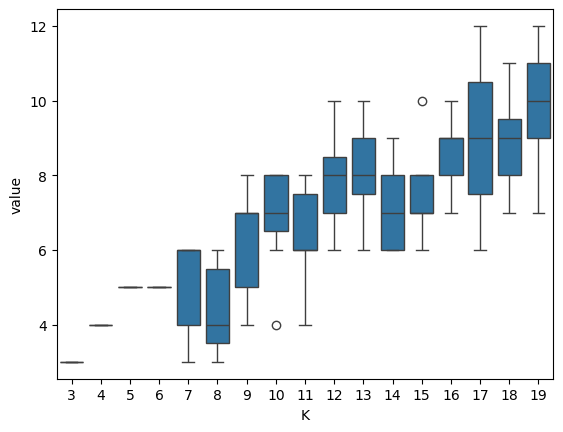

In [5]:
cv_list = glob.glob("./figure3/h3a_cv/output3/*.csv")
cvn = pd.read_csv(cv_list[0], index_col = 0)
#cvn.index = cvn.index + str(0)
for i in range(1, len(cv_list)):
    cvi = pd.read_csv(cv_list[i], index_col = 0)
    #cvi.index = cvi.index + str(i)
    cvn = pd.concat([cvn, cvi], axis = 0)
cvn["type"] = cvn.index
df_cv1 = cvn.melt(id_vars=["type"], var_name="K", value_name="value")
sns.boxplot(data = df_cv1.query("type == 'match' "), x = "K", y = "value")

In [2]:
hs_cv = pd.read_csv("./figure3/hs_cv/hs_cv_3_25.csv")
kg_cv = pd.read_csv("./figure3/kg_cv/kg_cv_3_25.csv")

Text(0.5, 0, 'Number of components (K)')

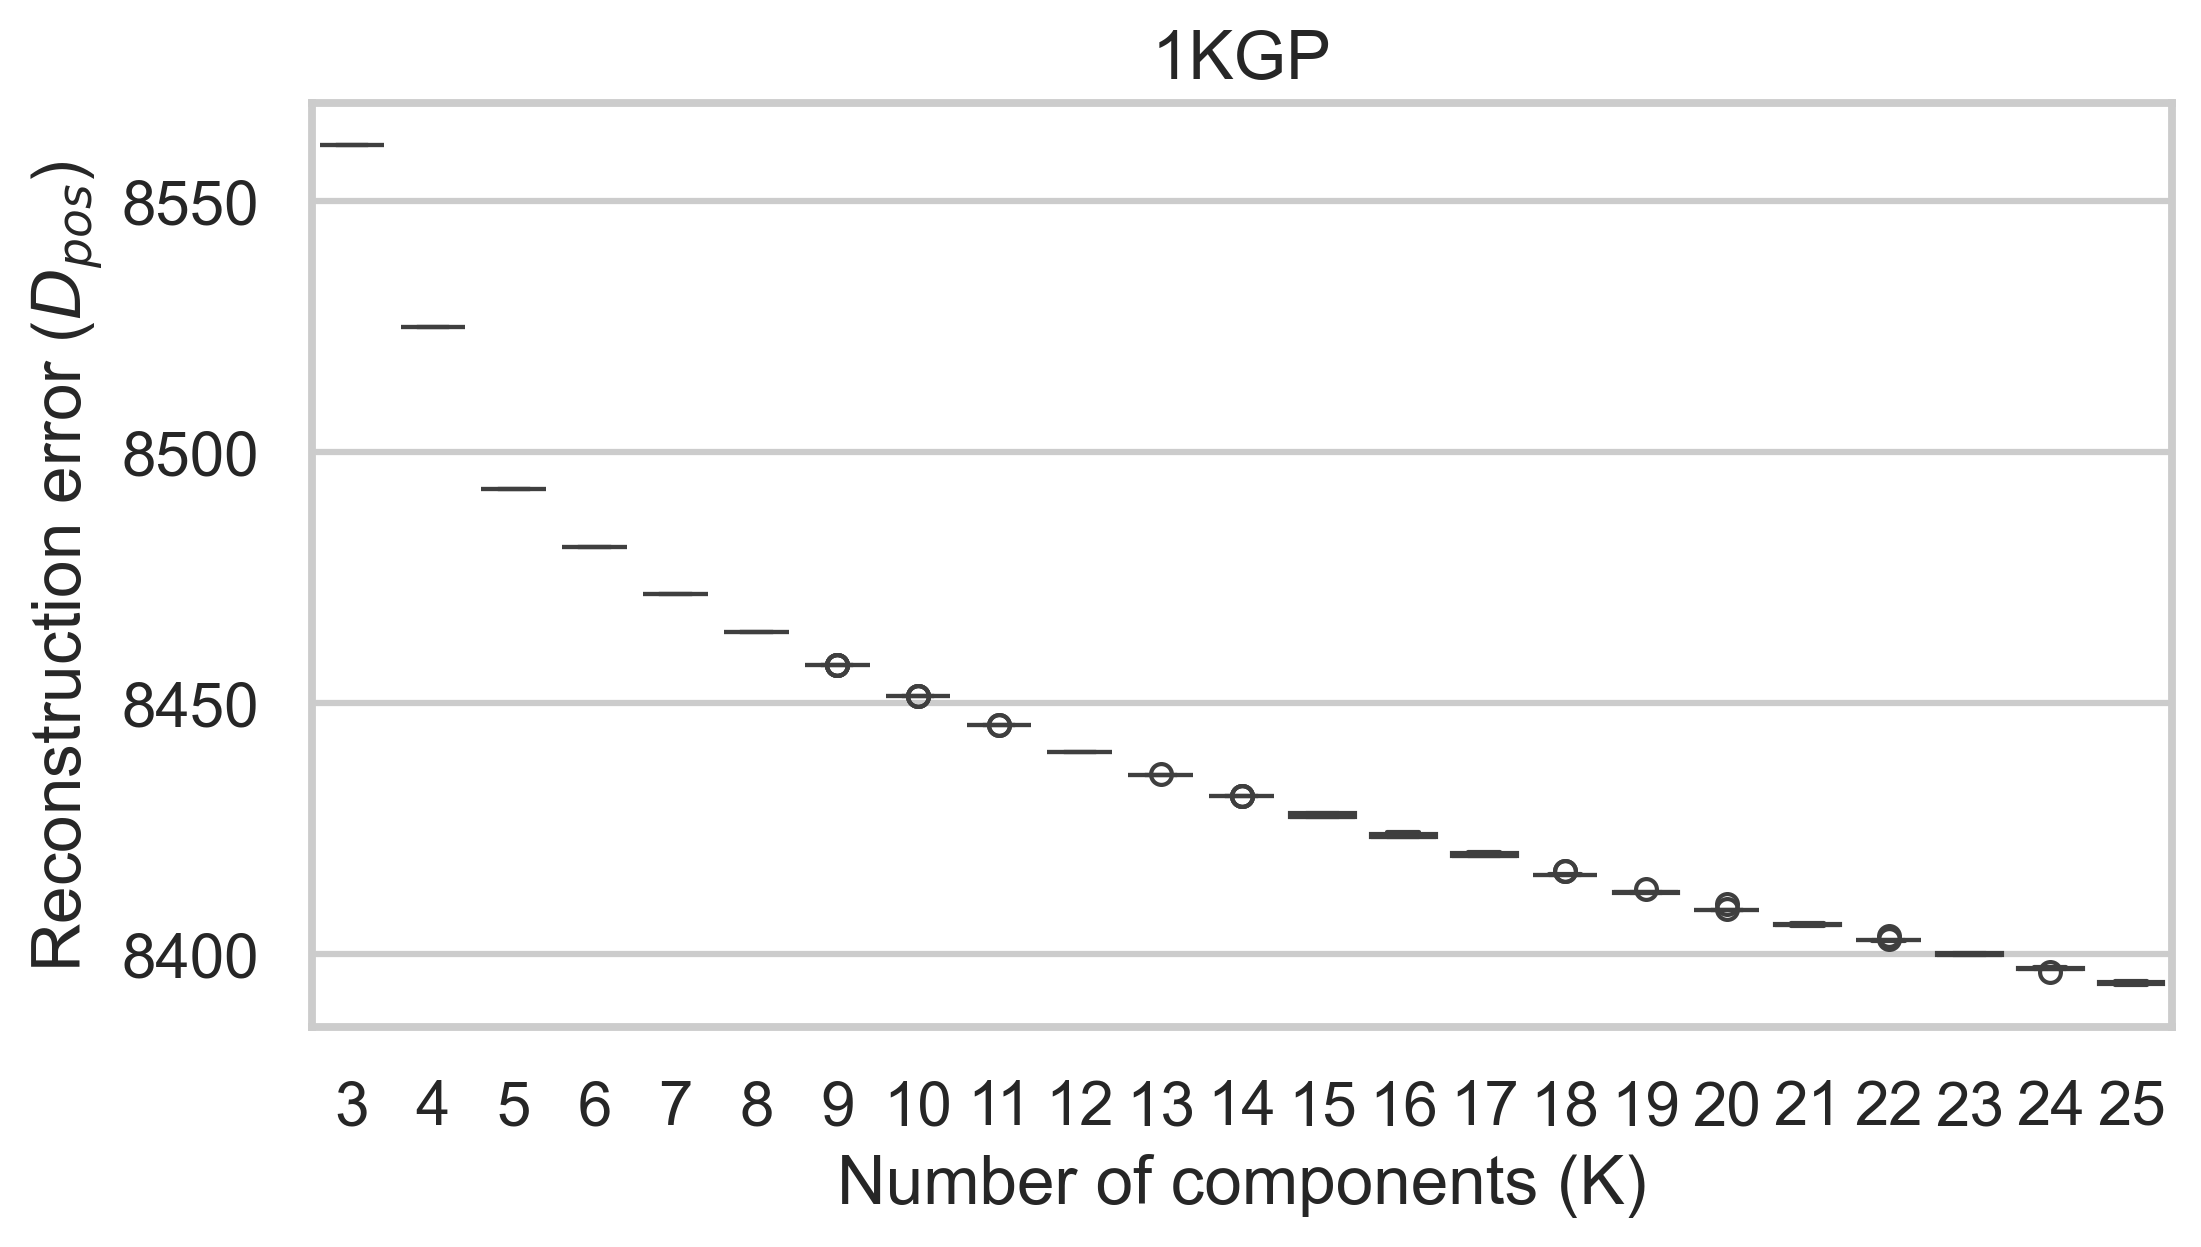

In [16]:
para = "pos_err"
fig, g = plt.subplots(1, 1, figsize = (8,4), dpi = 300, 
                       sharey = True)
sns.set_context("talk", font_scale = 0.9)
sns.set_style("whitegrid")
sns.boxplot(ax = g,
            x = 'K', y = 'value', 
            data = kg_cv.query("type == @para "),
            fliersize = 5)
g.set_title("1KGP")
#g.set_ylabel("Shared components")
#g.set_ylabel("average correlation")
g.set_ylabel("Reconstruction error ($D_{pos}$)")
g.set_xlabel("Number of components (K)")

Text(0.5, 0, 'Number of components (K)')

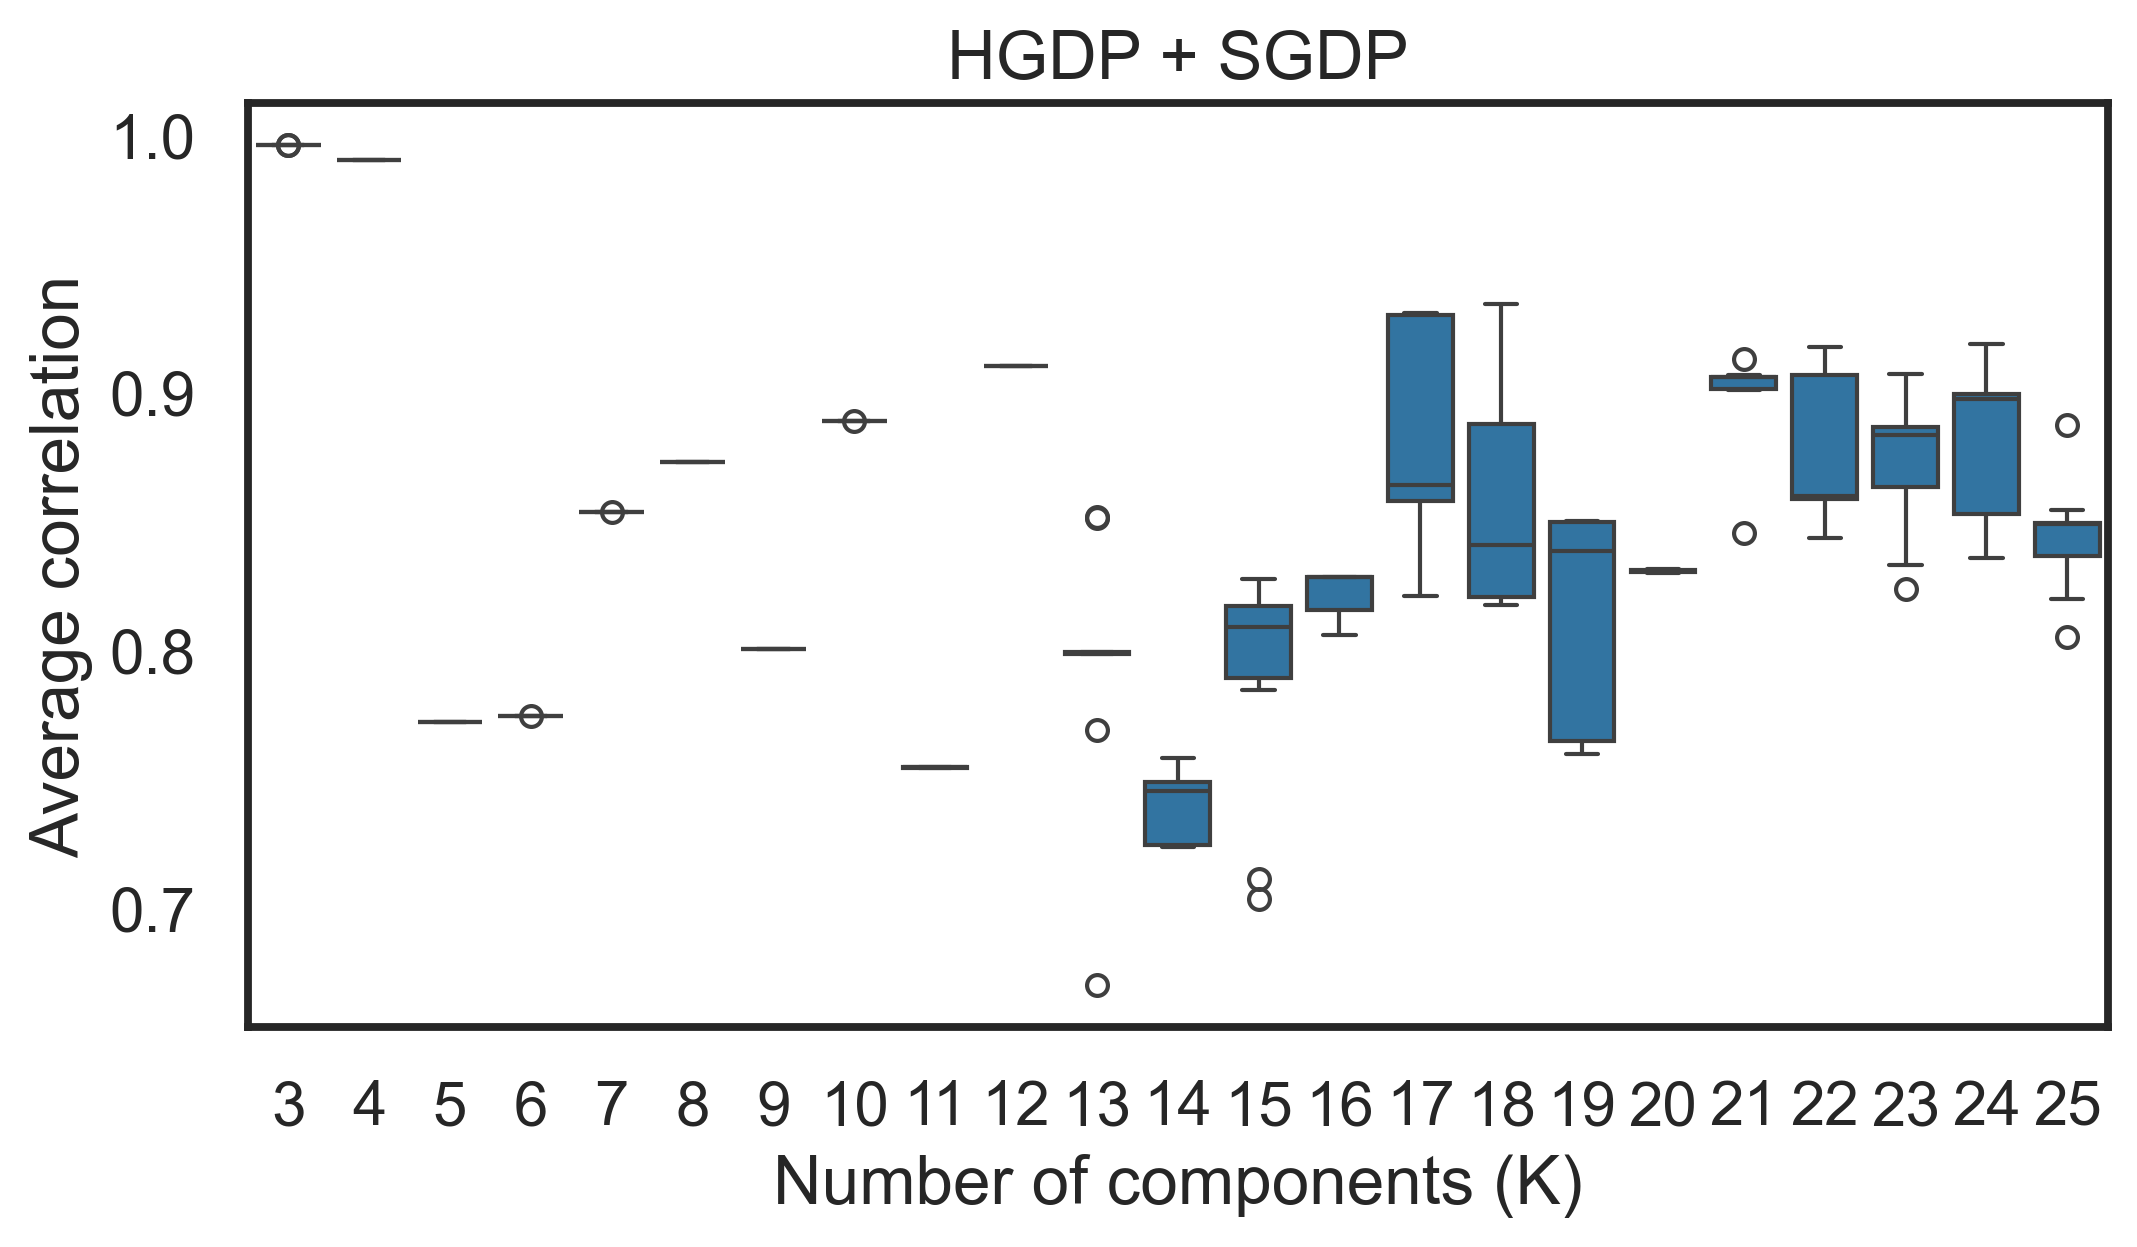

In [10]:
fig, g = plt.subplots(1, 1, figsize = (8,4), dpi = 300, 
                       sharey = True)
sns.set_context("talk", font_scale = 0.9)
sns.set_style("white")
sns.boxplot(ax = g,
            x = 'K', y = 'value', 
            data = hs_cv.query("type == @para "),
            fliersize = 5)
g.set_title("HGDP + SGDP")
#g.set_ylabel("Shared components")
g.set_ylabel("Average correlation")
g.set_xlabel("Number of components (K)")

In [75]:
hs_q_pos = pd.read_csv("../NMF/hs/11/Q_pos.csv", index_col = 0)
hs_q_neg = pd.read_csv("../NMF/hs/11/Q_neg.csv", index_col = 0)

K = hs_q_pos.shape[1]
corr_matrix = np.corrcoef(hs_q_pos.T, hs_q_neg.T)[:K, K:] 
df_corr = pd.DataFrame(corr_matrix, index = range(1,K+1), columns = range(1, K+1))

In [76]:
hs_q_posn = np.delete(hs_q_pos, 6, 1)
hs_q_negn = np.delete(hs_q_neg, 4, 1)
corr_matrix = np.corrcoef(hs_q_posn.T, hs_q_negn.T)[:K-1, K-1:] 
df_corr = pd.DataFrame(corr_matrix, index = list(range(1,7)) + list(range(8,K+1)), 
                    columns = list(range(1,5)) + list(range(6,K+1)))

In [72]:
kg_q_pos = pd.read_csv("../NMF/kg/12/Q_pos.csv", index_col = 0)
kg_q_neg = pd.read_csv("../NMF/kg/12/Q_neg.csv", index_col = 0)

K = kg_q_pos.shape[1]
corr_matrix = np.corrcoef(kg_q_pos.T, kg_q_neg.T)[:K, K:] 
df_corr = pd.DataFrame(corr_matrix, index = range(1,K+1), columns = range(1, K+1))

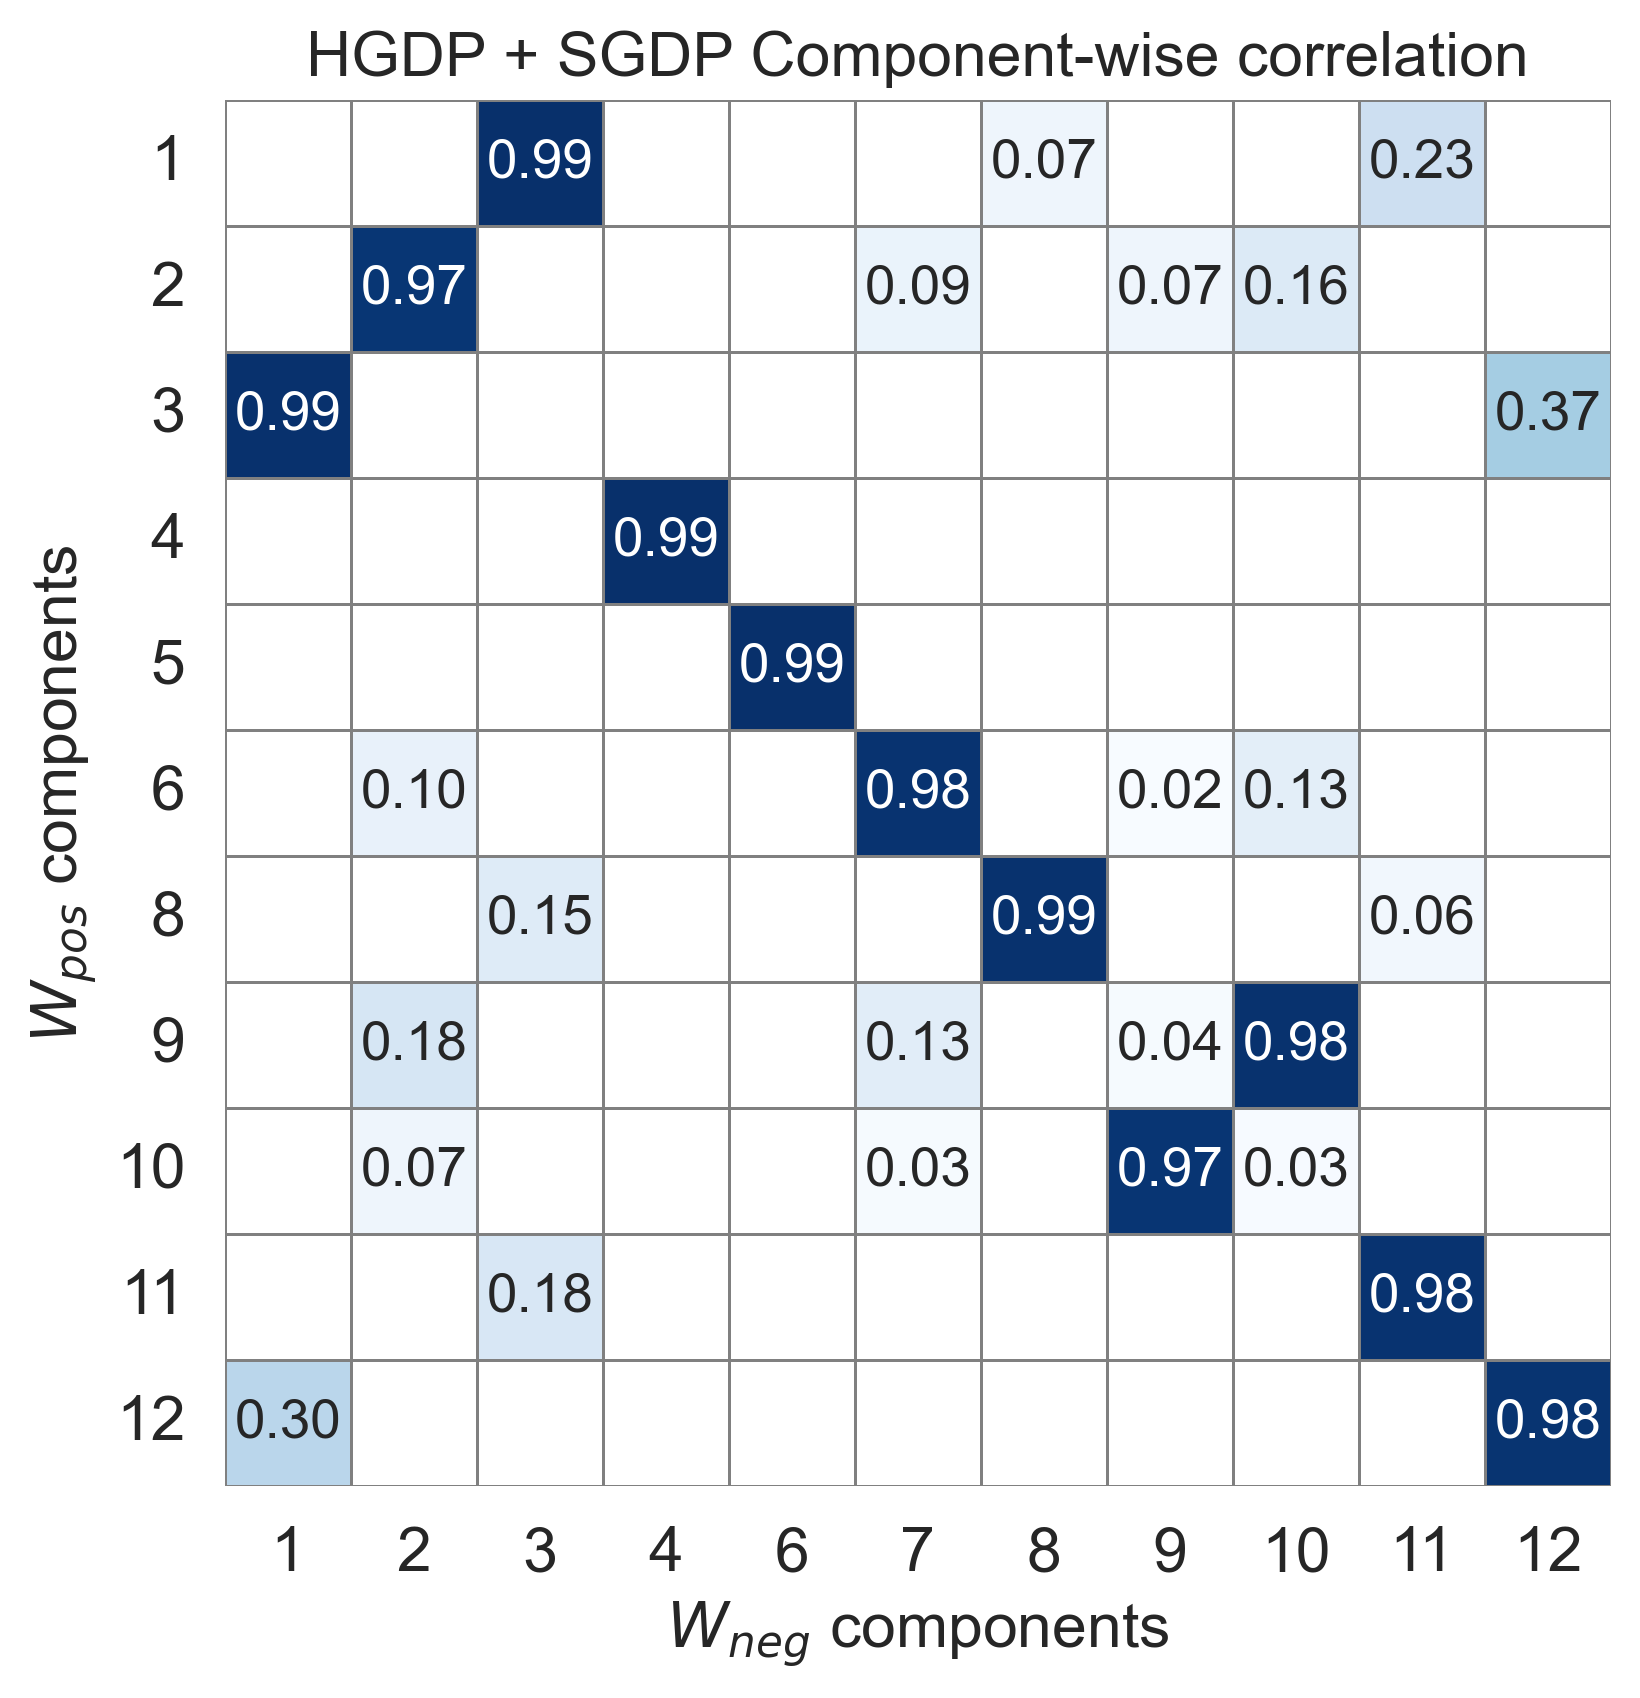

In [78]:
mask = (df_corr < 0)   
plt.figure(figsize=(6, 6), dpi=300)
sns.set_context("talk")
sns.set_theme(style="white", font_scale = 1.1)
g = sns.heatmap(df_corr, 
            mask = mask,
            annot=True, fmt='.2f', 
            linewidth =.3,
            linecolor="gray",
            square = True,
            cbar = False,
            cmap = "Blues")
g.set_yticklabels(g.get_yticklabels(), rotation = 0, fontsize = 15)
g.set_xticklabels(g.get_xticklabels(), fontsize = 15)
g.set_title("HGDP + SGDP Component-wise correlation", fontsize = 15)
g.set_xlabel("$W_{neg}$ components", fontsize = 15)
g.set_ylabel("$W_{pos}$ components", fontsize = 15)
plt.show()

In [2]:
neg_4 = pd.read_csv("./figure3/hs_11/neg_4.csv")
pos_6 = pd.read_csv("./figure3/hs_11/pos_6.csv")

pns = pd.concat([pos_6[["6"]], neg_4[["4", "data"]]], axis = 1)
melted_pns = pd.melt(pns, id_vars = ["data"], value_vars = ["4","6"])

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

6_hgdp vs. 6_sgdp: Mann-Whitney-Wilcoxon test two-sided, P_val:1.198e-12 U_stat=7.769e+04
4_hgdp vs. 4_sgdp: Mann-Whitney-Wilcoxon test two-sided, P_val:3.883e-151 U_stat=0.000e+00


C:\Users\xiaf\AppData\Local\Temp\ipykernel_13780\1717008411.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  g.set_xticklabels(["$W_{neg,5}$", "$W_{pos,7}$"])


(<Axes: >,
  <statannotations.Annotation.Annotation at 0x1fc5e78d2d0>])

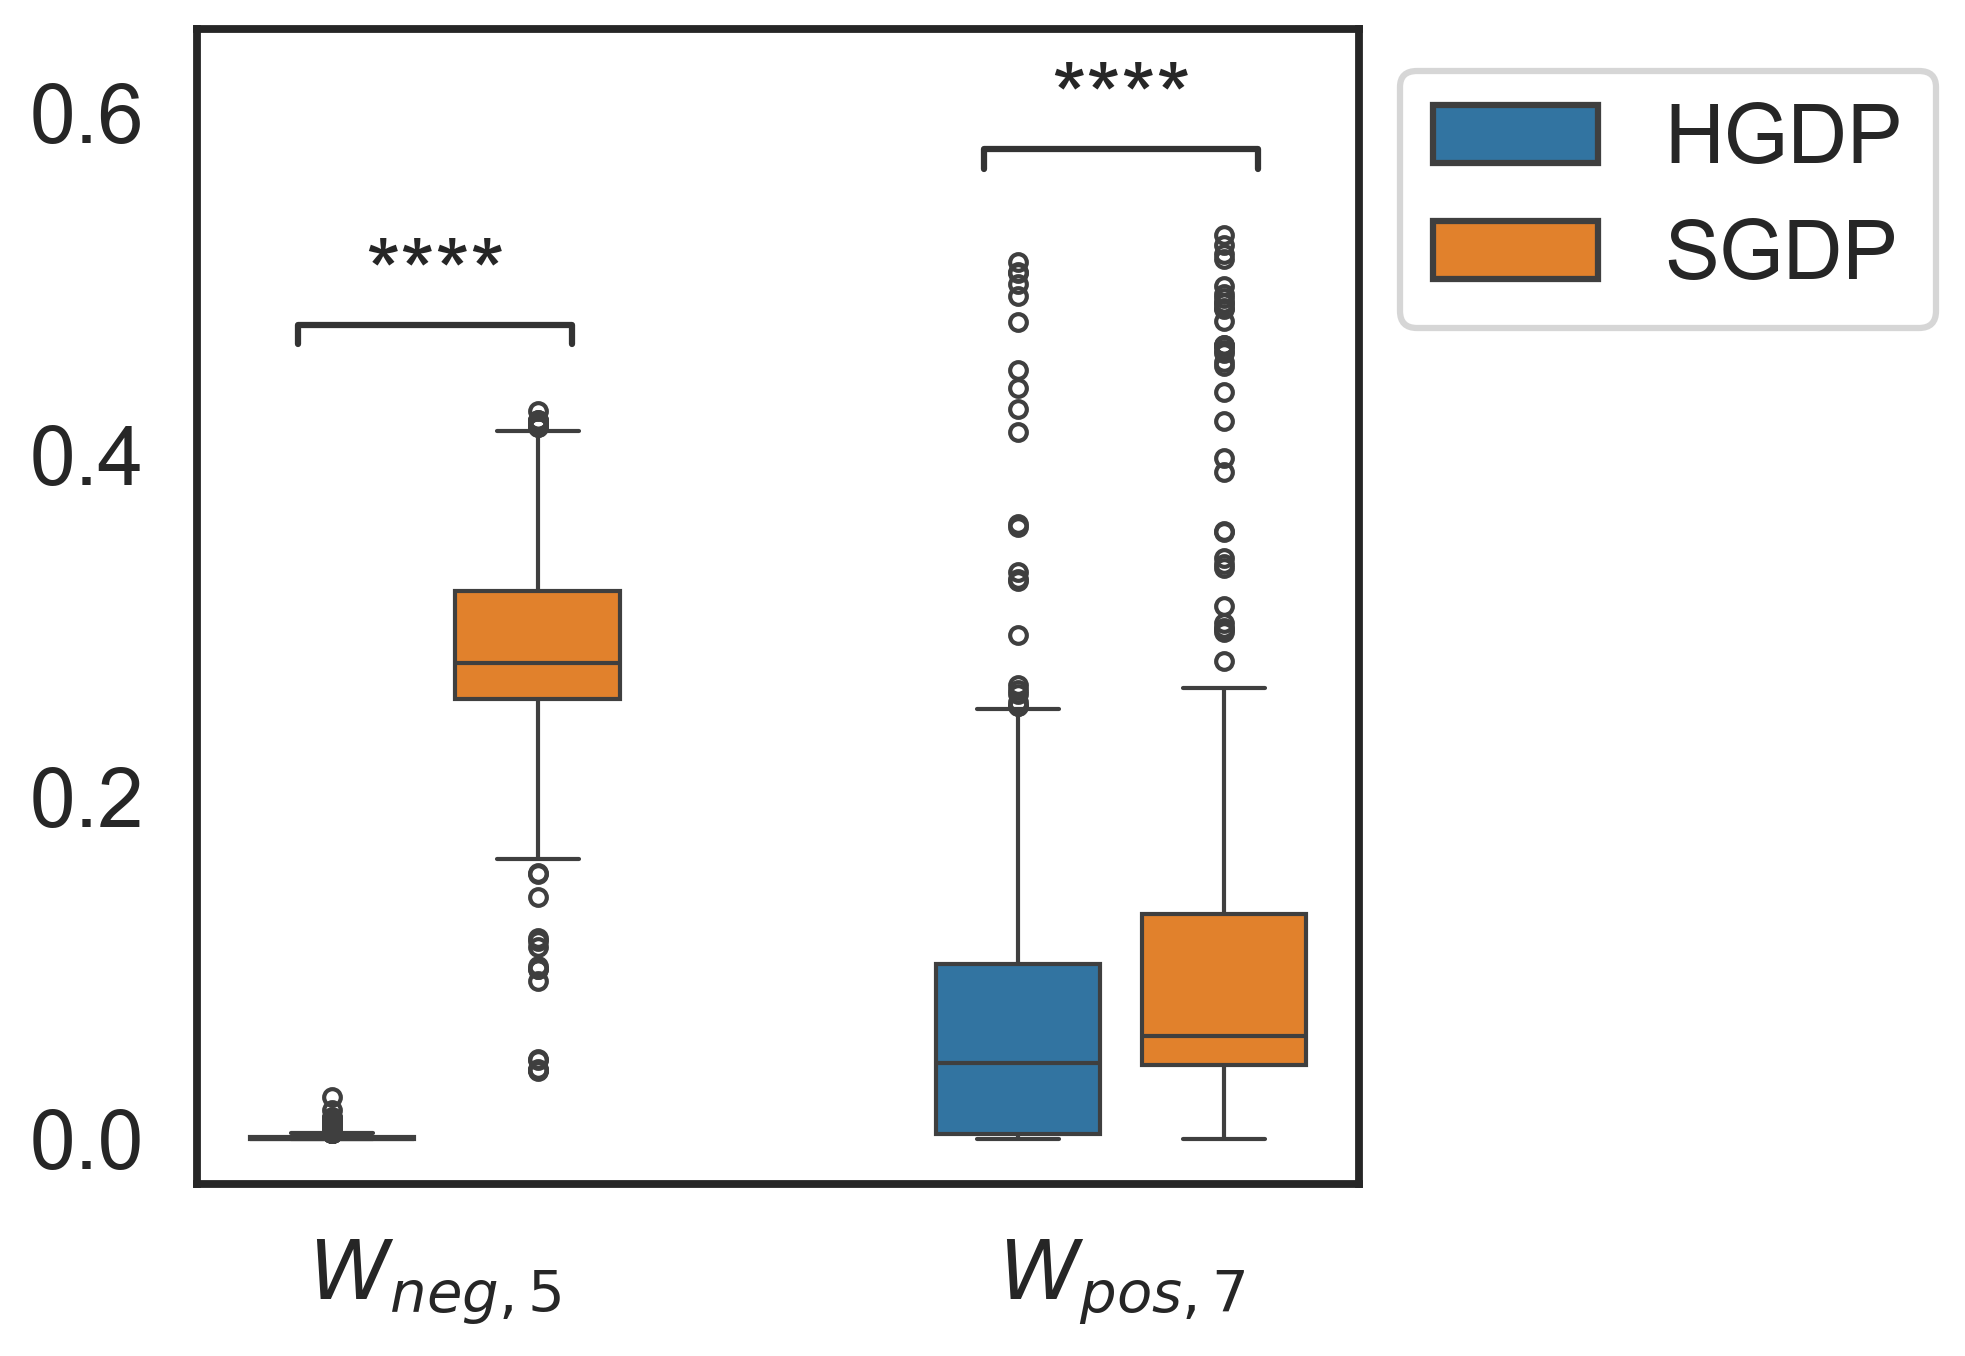

In [9]:
fig, g = plt.subplots(1, 1, figsize = (5,5), dpi = 300)
sns.set_context("talk", font_scale = 1.2)
sns.set_style("white")
sns.boxplot(data = melted_pns, x = "variable", y = "value", 
    hue = "data",
    #width=0.6,                  
    fliersize = 4,                
    palette = "tab10",  
    width = 0.6,           
    gap = 0.2,
    #linewidth = 1.2,
    ax = g)
#plt.legend(bbox_to_anchor=(1, 1), loc='upper left')
g.set_xticklabels(["$W_{neg,5}$", "$W_{pos,7}$"])
g.set_ylabel("")
g.set_xlabel("")
handles, labels = g.get_legend_handles_labels()
g.legend(
    handles, ["HGDP", "SGDP"], 
    #title="Markers", fontsize=14, title_fontsize=15,
    #loc="upper left", 
    bbox_to_anchor=(1,1)
    #frameon=False
)

pairs = [ (("4","hgdp"), ("4","sgdp")), (("6","hgdp"), ("6","sgdp"))]  # (x,hue) pairs
annotator = Annotator(g, pairs, data=melted_pns, x="variable",
                      y="value", hue="data")
annotator.configure(test= "Mann-Whitney", text_format='star', loc='inside')
annotator.apply_and_annotate()